<a href="https://colab.research.google.com/github/hmooy/Geolocation/blob/branch/geolocation_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re
import joblib

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
svm_model_loaded = joblib.load('/content/gdrive/My Drive/Colab Notebooks/KT_assignment2/svm_model.pkl')

In [10]:
svm_model_loaded

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
path = 'gdrive/My Drive/Colab Notebooks/KT_assignment2/train_tweets.txt'

id_ = []
user = []
text = []
location = []

with open(path, mode = 'r', encoding = 'ISO-8859-1', newline= '\n') as file:

  for line in file:
    
    g = re.match(r'^(\d+)[,]([^,]*),(.*),(\w+)?', line).groups()
    id_.append(g[0])
    user.append(g[1])
    text.append(g[2])
    location.append(g[3])

  file.close()

In [0]:
train = pd.DataFrame({'id':id_,'user':user,'text':text,'label':location})

In [42]:
train[10:100]

,id,user,text,label
10,120,USER_ce270acf,"""@USER_ab9b724e liike 9""",NewYork
11,121,USER_ce270acf,"""@USER_f5c280df yeah""",NewYork
12,122,USER_ce270acf,"""You just dnt undastand _ppl just alwayss wann...",NewYork
13,123,USER_ce270acf,"""RT @USER_2f5bc961: RT: @USER_ce270acf All ppl...",NewYork
14,124,USER_ce270acf,"""Well boys will be boys_ and hearts will be he...",NewYork
...,...,...,...,...
95,499,USER_4a302bbd,"""@USER_e551e399 :)""",California
96,500,USER_4a302bbd,"""How's everyone doing today? My morning was ju...",California
97,501,USER_4a302bbd,"""This Wal Mart movie is so sad! I feel bad AGA...",California
98,502,USER_4a302bbd,"""Chocolate makes my life everytime it touches ...",California


In [43]:
train['label'].value_counts()

NewYork       60810
California    20629
Georgia       15146
Name: label, dtype: int64

In [49]:
frequency_table_user = train['user'].value_counts()
frequency_table_user.head(-5)

USER_6b07169e    301
USER_2e157dc3    243
USER_c8613ca2    228
USER_eadb6ab3    183
USER_4d14a523    181
                ... 
USER_50317f7c     20
USER_2844bcd5     20
USER_932fe0cd     20
USER_84dfc4df     20
USER_29f5c8a9     20
Name: user, Length: 2391, dtype: int64

In [0]:
id_ = []
user = []
text = []
location = []

with open('gdrive/My Drive/Colab Notebooks/KT_assignment2/test_tweets.txt', mode = 'r', encoding = 'ISO-8859-1', newline= '\n') as file:

  for line in file:
    
    g = re.match(r'^(\d+)[,]([^,]*),(.*),(\w+)?', line).groups()
    id_.append(g[0])
    user.append(g[1])
    text.append(g[2])
    location.append(g[3])

  file.close()

test = pd.DataFrame({'id':id_, 'user' : user, 'text': text, 'label' : location})

In [52]:
test.head()

,id,user,text,label
0,32,USER_d12c6a27,"""Who died Lee? You. Detective U? No, not u, u....",None
1,33,USER_d12c6a27,"""R u o k?.........yea, I slipped & I fell........",None
2,34,USER_d12c6a27,"""So cold""",None
3,35,USER_d12c6a27,"""@USER_f7fb01ae-Oh. I was thinking bout the Ch...",None
4,36,USER_d12c6a27,"""Listening II Ego-Trey Songz""",None


In [53]:
test['user'].value_counts()

USER_f35e4685    259
USER_43357d60    187
USER_8acf6a6b    158
USER_b404803c    143
USER_520dddc4    142
                ... 
USER_f1a0f984     20
USER_ca067496     20
USER_fda0e237     20
USER_eac53cac     20
USER_d649b0c8     20
Name: user, Length: 802, dtype: int64

In [0]:
train_test = train.append(test, ignore_index= True)

In [90]:
train_test.head()

,id,user,text,label
0,110,USER_ce270acf,"""Forget ma stoopiid friiends!!!""",NewYork
1,111,USER_ce270acf,"""@USER_00791b0d nuttiin much_how bout u!""",NewYork
2,112,USER_ce270acf,"""RT @USER_00791b0d: RT @USER_ce270acf: @USER_0...",NewYork
3,113,USER_ce270acf,"""@USER_e870cfe3 umm its souljawfy""",NewYork
4,114,USER_ce270acf,"""Smt mommy hurry manqqs :(""",NewYork


In [0]:
tokenized_text = train_test['text'].apply(lambda x: x.split())

In [102]:
tokenized_text.head()

0                ["Forget, ma, stoopiid, friiends!!!"]
1      ["@USER_00791b0d, nuttiin, much_how, bout, u!"]
2    ["RT, @USER_00791b0d:, RT, @USER_ce270acf:, @U...
3              ["@USER_e870cfe3, umm, its, souljawfy"]
4                    ["Smt, mommy, hurry, manqqs, :("]
Name: text, dtype: object

##Stemming the suffixes

In [103]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])

tokenized_text.head()

0                ["forget, ma, stoopiid, friiends!!!"]
1      ["@user_00791b0d, nuttiin, much_how, bout, u!"]
2    ["rt, @user_00791b0d:, RT, @user_ce270acf:, @u...
3               ["@user_e870cfe3, umm, it, souljawfy"]
4                     ["smt, mommi, hurri, manqq, :("]
Name: text, dtype: object

In [0]:
for i in range(len(tokenized_text)):
  tokenized_text[i] = ' '.join(tokenized_text[i])

train_test['clean_text'] = tokenized_text

In [105]:
train_test['clean_text']

0                          "forget ma stoopiid friiends!!!"
1                 "@user_00791b0d nuttiin much_how bout u!"
2         "rt @user_00791b0d: RT @user_ce270acf: @user_0...
3                         "@user_e870cfe3 umm it souljawfy"
4                                "smt mommi hurri manqq :("
                                ...                        
129557    "rt @user_bc060c02: goin out tonite----]]wher ...
129558    "rt @user_8d476913: @user_7f5be0d9 dem sound d...
129559         "mi need yuh fi put mi to sleep like nyquil"
129560     "musicplayin# she tell mi she nah let goooo!!!!"
129561                                          "blah blah"
Name: clean_text, Length: 129562, dtype: object

(-0.5, 799.5, 499.5, -0.5)

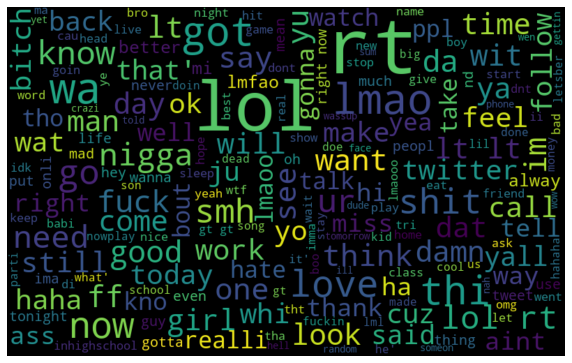

In [106]:
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in train_test['clean_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [0]:
NewYork_words = ' '.join([text for text in train_test['clean_text'][train_test['label']== 'NewYork']])

(-0.5, 799.5, 499.5, -0.5)

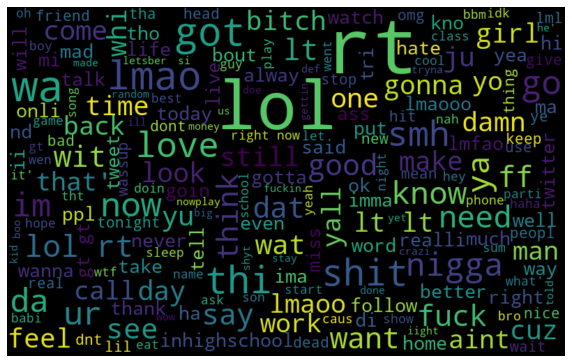

In [108]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(NewYork_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

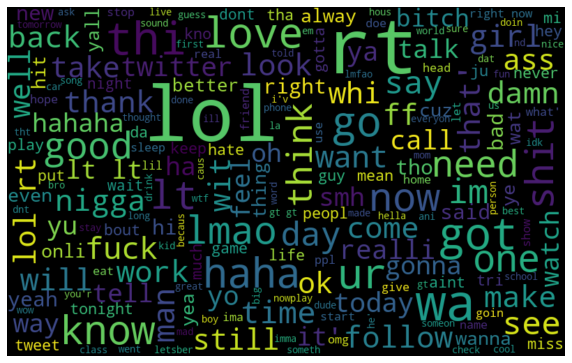

In [109]:
California_words = ' '.join([text for text in train_test['clean_text'][train_test['label']== 'California']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(California_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 799.5, 499.5, -0.5)

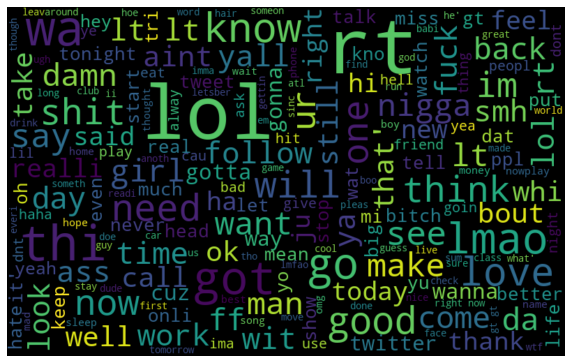

In [110]:
Georgia_words = ' '.join([text for text in train_test['clean_text'][train_test['label'] == 'Georgia']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(Georgia_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## function to collect hashtags


In [0]:
def hashtag_extract(x):

  hashtags = []

  for i in x:
    ht = re.findall(r'#(\w+)', i)
    hashtags.append(ht)
  
  return hashtags
  

In [0]:
HT_NewYork = hashtag_extract(train_test['clean_text'][train_test['label'] == 'NewYork'])

HT_California = hashtag_extract(train_test['clean_text'][train_test['label'] == 'California'])

HT_Georgia= hashtag_extract(train_test['clean_text'][train_test['label'] == 'Georgia'])

In [0]:
HT_NewYork = sum(HT_NewYork, [])
HT_California = sum(HT_California, [])
HT_Georgia = sum(HT_Georgia, [])

[Text(0, 0.5, 'Count')]

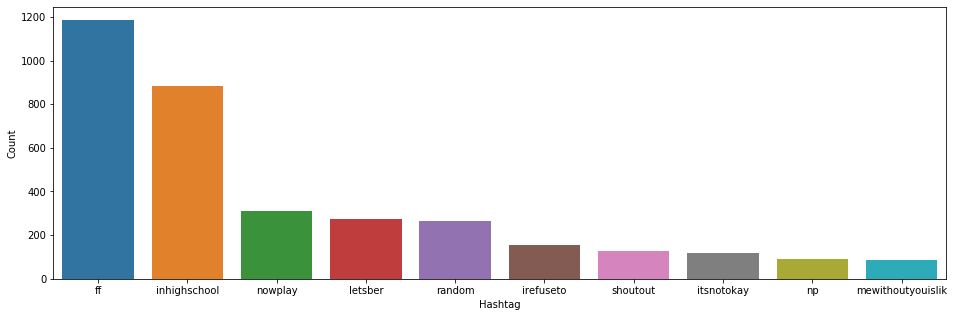

In [114]:
import seaborn as sns
import nltk

a = nltk.FreqDist(HT_NewYork)

d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))

ax = sns.barplot(data = d, x = "Hashtag", y = "Count")

ax.set(ylabel='Count')



[Text(0, 0.5, 'Count')]

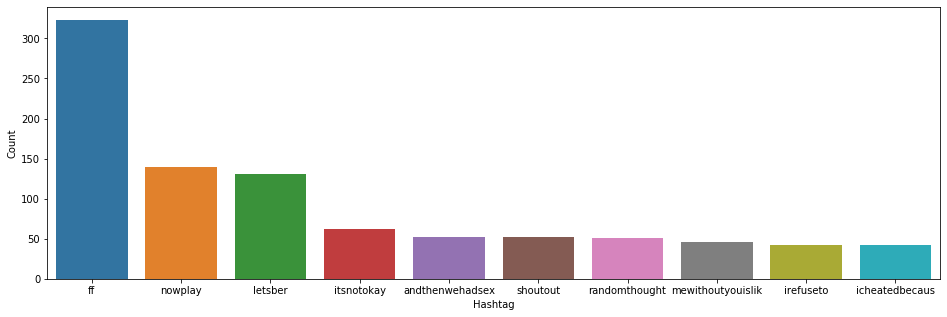

In [115]:
b = nltk.FreqDist(HT_California)

e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

e = e.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))

ax = sns.barplot(data = e, x = "Hashtag", y = "Count")

ax.set(ylabel='Count')


[Text(0, 0.5, 'Count')]

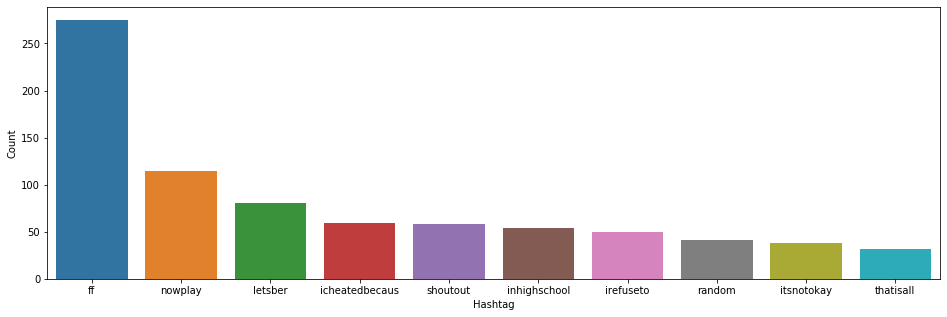

In [116]:
c = nltk.FreqDist(HT_Georgia)

f = pd.DataFrame({'Hashtag': list(c.keys()), 'Count': list(c.values())})

f = f.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))

ax = sns.barplot(data = f, x = "Hashtag", y = "Count")

ax.set(ylabel='Count')

## Bag of words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2, max_features = 1000, stop_words = 'english')

bow = bow_vectorizer.fit_transform(train_test['clean_text'])

## TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

user_text = train_test['user']+' '+train_test['text']

tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

tfidf = tfidf_vectorizer.fit_transform(user_text)

In [143]:
tfidf.todense()[2]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

##Build model


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC


train_tfidf = tfidf[:len(train),:]
test_tfidf = tfidf[len(train):,:]
train_label = train['label']


some_tfidf = tfidf[20:100,:]
some_label = train['label'][20:100]








In [151]:
svm_clf = SVC()
svm_clf.fit(some_tfidf,some_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
random_test = some_tfidf[20:21]

In [158]:
svm_clf.predict(random_test)

array(['NewYork'], dtype=object)

In [157]:
svm_clf.fit(train_tfidf, train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [161]:
some_digit_scores = svm_clf.decision_function(some_tfidf)
some_digit_scores

array([[ 0.86990052, -0.19503716,  2.22405922],
       [ 0.92456155, -0.21021992,  2.22222396],
       [-0.17777519,  0.82742933,  2.22969366],
       [-0.18353631,  0.85446851,  2.22222792],
       [ 0.99984483, -0.22222241,  2.22223965],
       [-0.2550987 ,  1.14720073,  2.2372677 ],
       [ 0.91402791, -0.20819433,  2.22263776],
       [-0.17690293,  0.83591236,  2.2258202 ],
       [-0.20626686,  0.90458849,  2.22311569],
       [ 0.86245472, -0.1891836 ,  2.22277251],
       [ 0.91838443, -0.20877618,  2.22223637],
       [ 0.99984483, -0.22222241,  2.22223965],
       [ 0.99994667, -0.22222803,  2.22223396],
       [ 0.99372106, -0.22150057,  2.22221628],
       [ 1.15655344, -0.21709944,  2.16516975],
       [ 1.10306315, -0.20042155,  2.17154886],
       [ 2.1781015 , -0.22044419,  1.14870443],
       [ 1.13025861, -0.1932686 ,  2.14158835],
       [ 1.00012713, -0.22222195,  2.22220782],
       [ 0.87675358, -0.19245936,  2.22044713],
       [ 0.93412727, -0.21229842,  2.222

In [0]:
test_tfidf = tfidf[len(train):,:]
prediction = svm_clf.predict(test_tfidf)

In [163]:
import joblib

my_tfidfmodel = svm_clf

joblib.dump(my_tfidfmodel, 'svm_tfidfmodel.pkl')

['svm_tfidfmodel.pkl']

In [0]:
import torch
path = F"/content/gdrive/My Drive/Colab Notebooks/Oreilly Machine Learning/{'svm_model'}"
torch.save(my_model, path)

In [0]:
result = pd.DataFrame({'tweet-id':test['id'],'class':prediction})

In [0]:
result.to_csv('svm_tfidfresult.csv', index = None)

In [0]:
!cp svm_tfidfresult.csv "/content/gdrive/My Drive/Colab Notebooks/KT_assignment2/"